In [1]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Make Random dataset.

Source: http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

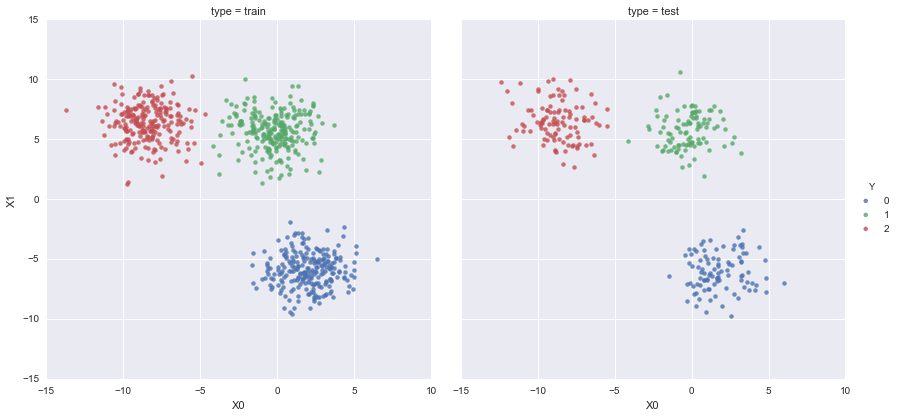

In [3]:
from sklearn.datasets import make_blobs

df = pd.DataFrame(columns=['X0','X1','Y'])
X, Y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.5)
train_test_split = 0.7
train_size = int(X.shape[0]*train_test_split) 
test_size = X.shape[0] - train_size
X_train,Y_train,X_test,Y_test = X[0:train_size],Y[0:train_size],X[train_size:],Y[train_size:] 
df['X0'],df['X1'],df['Y'] = X[:, 0],X[:, 1],Y
df['type'] = 'train'
df.loc[train_size:,'type'] = 'test'

#plt.title("four clusters", fontsize='small')
#plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
sns.lmplot(x='X0',y='X1',data=df,hue='Y',fit_reg=False, col='type', size=6)

## Decision Tree

[Decision Tree](https://en.wikipedia.org/wiki/Decision_tree_learning) is one of the simplest and most effective algorithm for classification and regression. Can be used on both numerical and categorical-type dataset.

The most common/popular ones are CART (Classification And Regression Tree), CHAID (CHi-squared Automatic Interaction Detector), and MARS etc..

The key idea is to have decision "fork" and branches out in a tree strucure, finally arriving at a good degree of segregation between classes. We do have to define a metric that can select good features for us to branch out.

![img](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

## Metrics

We are going to use [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) for this example. 

Let $ f_i $ be the fraction of data points labeled with class $ i $ in the dataset. The Impurity is:

$$ I(f) = \sum_{i \ne k} f_i \cdot f_k$$